# Handling Class Imbalance - Hotel Reservations

Applies SMOTE and class weights to handle imbalanced booking cancellation data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Hotel Reservations.csv")
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## 1. Analyze Class Distribution

Class Distribution:
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

Percentages:
booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: count, dtype: float64

Imbalance Ratio: 2.05:1


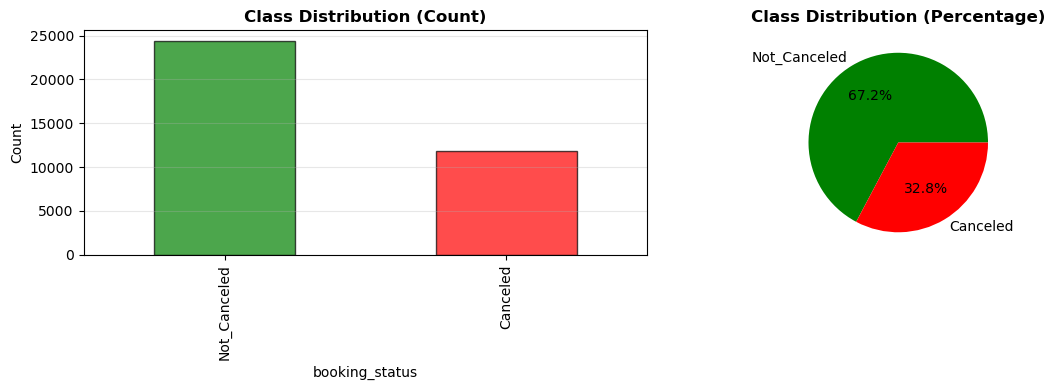

In [3]:
# Check target distribution
target_counts = df['booking_status'].value_counts()
print("Class Distribution:")
print(target_counts)
print("\nPercentages:")
print(target_counts / len(df) * 100)

# Calculate imbalance ratio
majority = target_counts.max()
minority = target_counts.min()
imbalance_ratio = majority / minority
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
target_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[0].set_title('Class Distribution (Count)', fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.3, axis='y')

target_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title('Class Distribution (Percentage)', fontweight='bold')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

## 2. Prepare Data for Balancing

In [4]:
# Select numerical features only for SMOTE
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Booking_ID' in numerical_features:
    numerical_features.remove('Booking_ID')

# Encode target
y = (df['booking_status'] == 'Canceled').astype(int)
X = df[numerical_features]

print(f"Features: {len(numerical_features)}")
print(f"Samples: {len(X)}")
print(f"\nOriginal class distribution:")
print(Counter(y))

Features: 14
Samples: 36275

Original class distribution:
Counter({0: 24390, 1: 11885})


## 3. Method 1: SMOTE (Synthetic Minority Over-sampling)

SMOTE Results:
Original shape: (36275, 14)
Resampled shape: (48780, 14)

Class distribution after SMOTE:
Counter({0: 24390, 1: 24390})


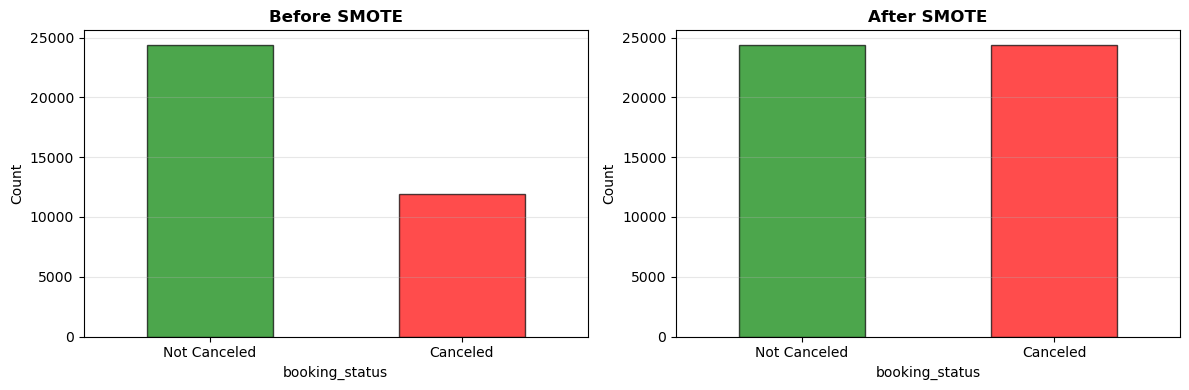

In [5]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("SMOTE Results:")
print(f"Original shape: {X.shape}")
print(f"Resampled shape: {X_smote.shape}")
print(f"\nClass distribution after SMOTE:")
print(Counter(y_smote))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

pd.Series(y).value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[0].set_title('Before SMOTE', fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Not Canceled', 'Canceled'], rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

pd.Series(y_smote).value_counts().plot(kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[1].set_title('After SMOTE', fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Not Canceled', 'Canceled'], rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 4. Method 2: ADASYN (Adaptive Synthetic Sampling)

In [6]:
# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

print("ADASYN Results:")
print(f"Resampled shape: {X_adasyn.shape}")
print(f"Class distribution:")
print(Counter(y_adasyn))

ADASYN Results:
Resampled shape: (48140, 14)
Class distribution:
Counter({0: 24390, 1: 23750})


## 5. Method 3: SMOTETomek (Combined Over/Under-sampling)

In [ ]:
# Apply SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X, y)

print("SMOTETomek Results:")
print(f"Resampled shape: {X_smote_tomek.shape}")
print(f"Class distribution:")
print(Counter(y_smote_tomek))

## 6. Method 4: Class Weights (No Resampling)

In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

print("Class Weights:")
print(f"Class 0 (Not Canceled): {class_weight_dict[0]:.4f}")
print(f"Class 1 (Canceled): {class_weight_dict[1]:.4f}")
print("\nUsage: Pass class_weight parameter to model")
print(f"Example: LogisticRegression(class_weight={class_weight_dict})")

## 7. Comparison of Methods

In [ ]:
# Compare all methods
comparison = pd.DataFrame({
    'Method': ['Original', 'SMOTE', 'ADASYN', 'SMOTETomek', 'Class Weights'],
    'Total Samples': [len(y), len(y_smote), len(y_adasyn), len(y_smote_tomek), len(y)],
    'Class 0': [Counter(y)[0], Counter(y_smote)[0], Counter(y_adasyn)[0], Counter(y_smote_tomek)[0], Counter(y)[0]],
    'Class 1': [Counter(y)[1], Counter(y_smote)[1], Counter(y_adasyn)[1], Counter(y_smote_tomek)[1], Counter(y)[1]],
    'Balanced': ['No', 'Yes', 'Yes', 'Yes', 'No (weighted)']
})

print("\n" + "="*80)
print("COMPARISON OF BALANCING METHODS")
print("="*80)
print(comparison.to_string(index=False))

## 8. Save Balanced Datasets

In [ ]:
# Save SMOTE dataset
df_smote = pd.DataFrame(X_smote, columns=numerical_features)
df_smote['booking_status_encoded'] = y_smote
df_smote.to_csv('Hotel_Reservations_SMOTE.csv', index=False)
print("✓ Saved: Hotel_Reservations_SMOTE.csv")

# Save class weights
pd.DataFrame([class_weight_dict]).to_csv('class_weights.csv', index=False)
print("✓ Saved: class_weights.csv")

print("\n" + "="*80)
print("CLASS IMBALANCE HANDLING COMPLETE!")
print("="*80)

## 9. Recommendations

### When to Use Each Method:

**SMOTE:**
- Best for moderate imbalance (2:1 to 10:1)
- Creates synthetic samples
- Use with cross-validation

**Class Weights:**
- Best for large datasets
- No data augmentation
- Faster training
- Supported by most sklearn models

**Recommendation for this dataset:**
- Try both SMOTE and class weights
- Compare using cross-validation
- Class weights preferred for production (no synthetic data)